#**Assignment 4: Random Forest & Gradient Boosting**


# **I. Package Imports & Reading the File**

#  Management Questions
 
Regarding the management problem, imagine that you are advising a real estate brokerage firm in its attempt to employ machine learning methods. The firm wants to use machine learning to complement conventional methods for assessing the market value of residential real estate. Of the modeling methods examined in your study, which would you recommend to management, and why?

In [76]:
# import base packages into the namespace for this program
import numpy as np
import pandas as pd
import seaborn as sns
 
# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer #??
from sklearn.model_selection import cross_val_score
from math import sqrt  # for root mean-squared error calculation
from sklearn.preprocessing import StandardScaler
#from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_moons
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline   
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
boston_input = pd.read_csv('gdrive/My Drive/Colab Notebooks/boston.csv')

In [4]:
# goal : to predict mv, median value home price in 1970's $
responseVar = ["mv"]

# **II. Exploratory Data Analysis (EDA)**

In [5]:
# check the pandas DataFrame object boston_input
print('\n boston DataFrame (first and last five rows): \n')
boston_input.head()


 boston DataFrame (first and last five rows): 



,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [6]:
boston_input.tail()

,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
501,Winthrop,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,Winthrop,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,Winthrop,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,Winthrop,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,Winthrop,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,19.0


In [7]:
print('\n General description of the boston_input DataFrame: \n')
boston_input.info()


 General description of the boston_input DataFrame: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   neighborhood  506 non-null    object 
 1   crim          506 non-null    float64
 2   zn            506 non-null    float64
 3   indus         506 non-null    float64
 4   chas          506 non-null    int64  
 5   nox           506 non-null    float64
 6   rooms         506 non-null    float64
 7   age           506 non-null    float64
 8   dis           506 non-null    float64
 9   rad           506 non-null    int64  
 10  tax           506 non-null    int64  
 11  ptratio       506 non-null    float64
 12  lstat         506 non-null    float64
 13  mv            506 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.5+ KB


In [8]:
# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
print('\nGeneral description of the boston DataFrame:')
print(boston.info())


General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rooms    506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  mv       506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None


In [9]:
print('\nDescriptive statistics of the boston DataFrame:')
print(boston.describe())


Descriptive statistics of the boston DataFrame:
             crim          zn       indus  ...     ptratio       lstat          mv
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...   18.455534   12.653063   22.528854
std      8.601545   23.322453    6.860353  ...    2.164946    7.141062    9.182176
min      0.006320    0.000000    0.460000  ...   12.600000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...   17.400000    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...   19.050000   11.360000   21.200000
75%      3.677082   12.500000   18.100000  ...   20.200000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...   22.000000   37.970000   50.000000

[8 rows x 13 columns]


In [10]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

In [11]:
# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)


Data dimensions: (506, 13)


## **IIa. Scaling Continuous Variables**

In [12]:
#standard scores for the columns... along axis 0
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))
# show standardization constants being employed
print(scaler.mean_)
print("\n")
print(scaler.scale_)

StandardScaler(copy=True, with_mean=True, with_std=True)
[2.25288538e+01 3.61352356e+00 1.13636364e+01 1.11367787e+01
 6.91699605e-02 5.54695059e-01 6.28463439e+00 6.85749012e+01
 3.79504269e+00 9.54940711e+00 4.08237154e+02 1.84555336e+01
 1.26530632e+01]


[9.17309810e+00 8.59304135e+00 2.32993957e+01 6.85357058e+00
 2.53742935e-01 1.15763115e-01 7.01922514e-01 2.81210326e+01
 2.10362836e+00 8.69865112e+00 1.68370495e+02 2.16280519e+00
 7.13400164e+00]


In [13]:
# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

In [14]:
# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)


Dimensions for model_data: (506, 13)


In [15]:
# Convert prelim_model_data to a dataframe
prelim_model_df = pd.DataFrame(prelim_model_data, index=boston.index, columns=boston.columns)
prelim_model_df

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67
502,20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08
503,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64
504,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48


 ## **IIb. Visualization**

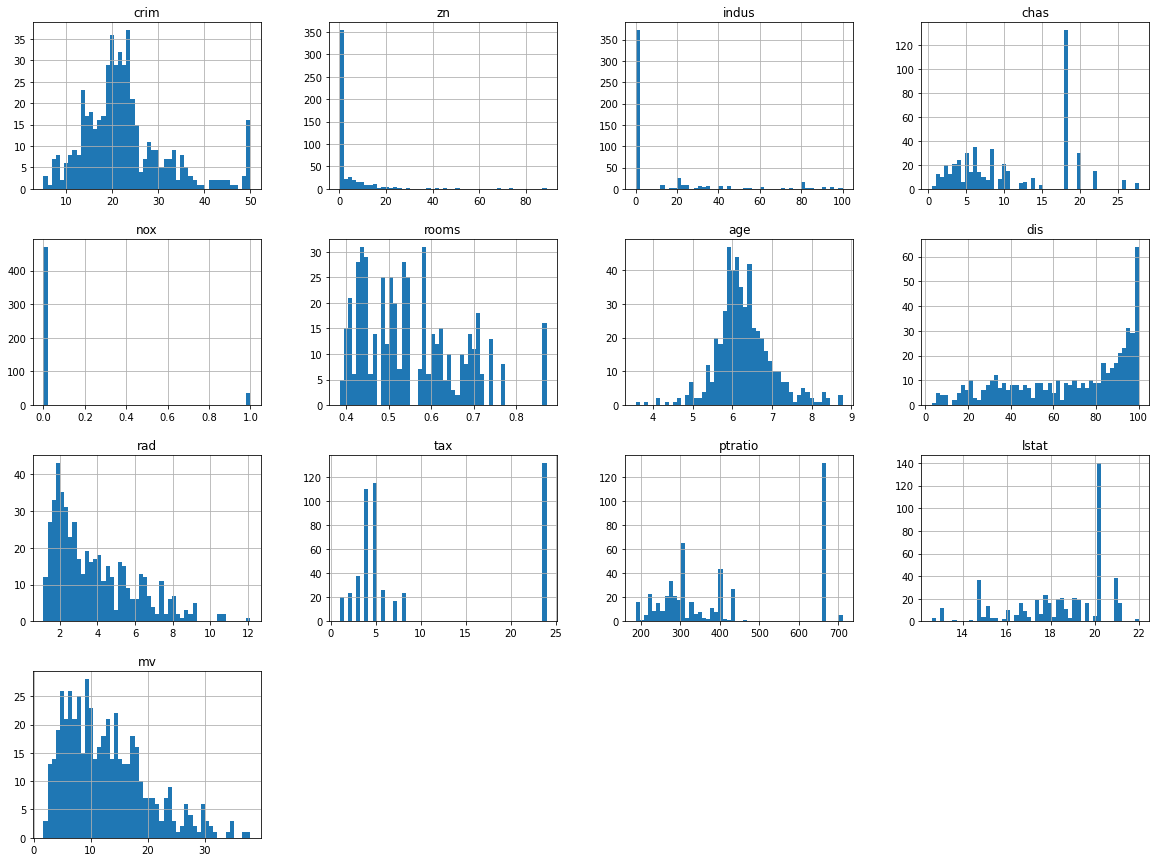

In [16]:
# EDA on the boston housing study data
prelim_model_df.hist(bins=50, figsize=(20,15))
plt.show()

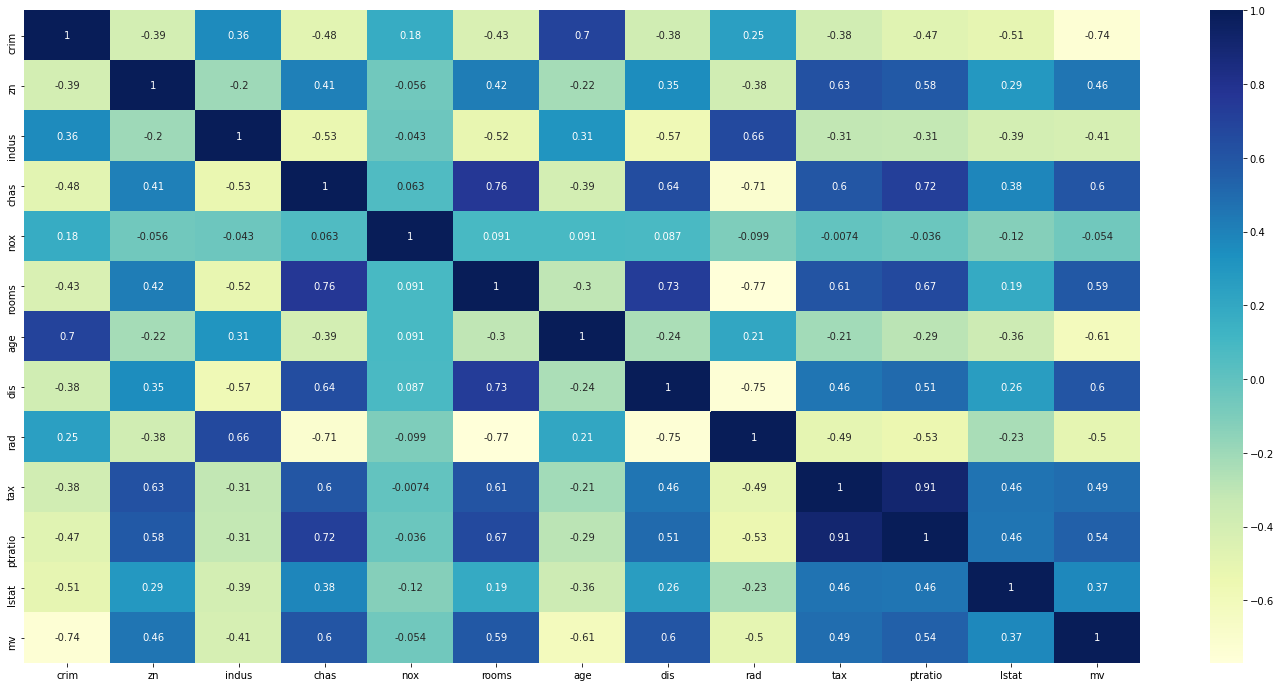

In [17]:
# Heatmap based on correlations among the variables
plt.figure(figsize=(25,12))
sns.heatmap(prelim_model_df.corr(), annot=True, cmap="YlGnBu", )

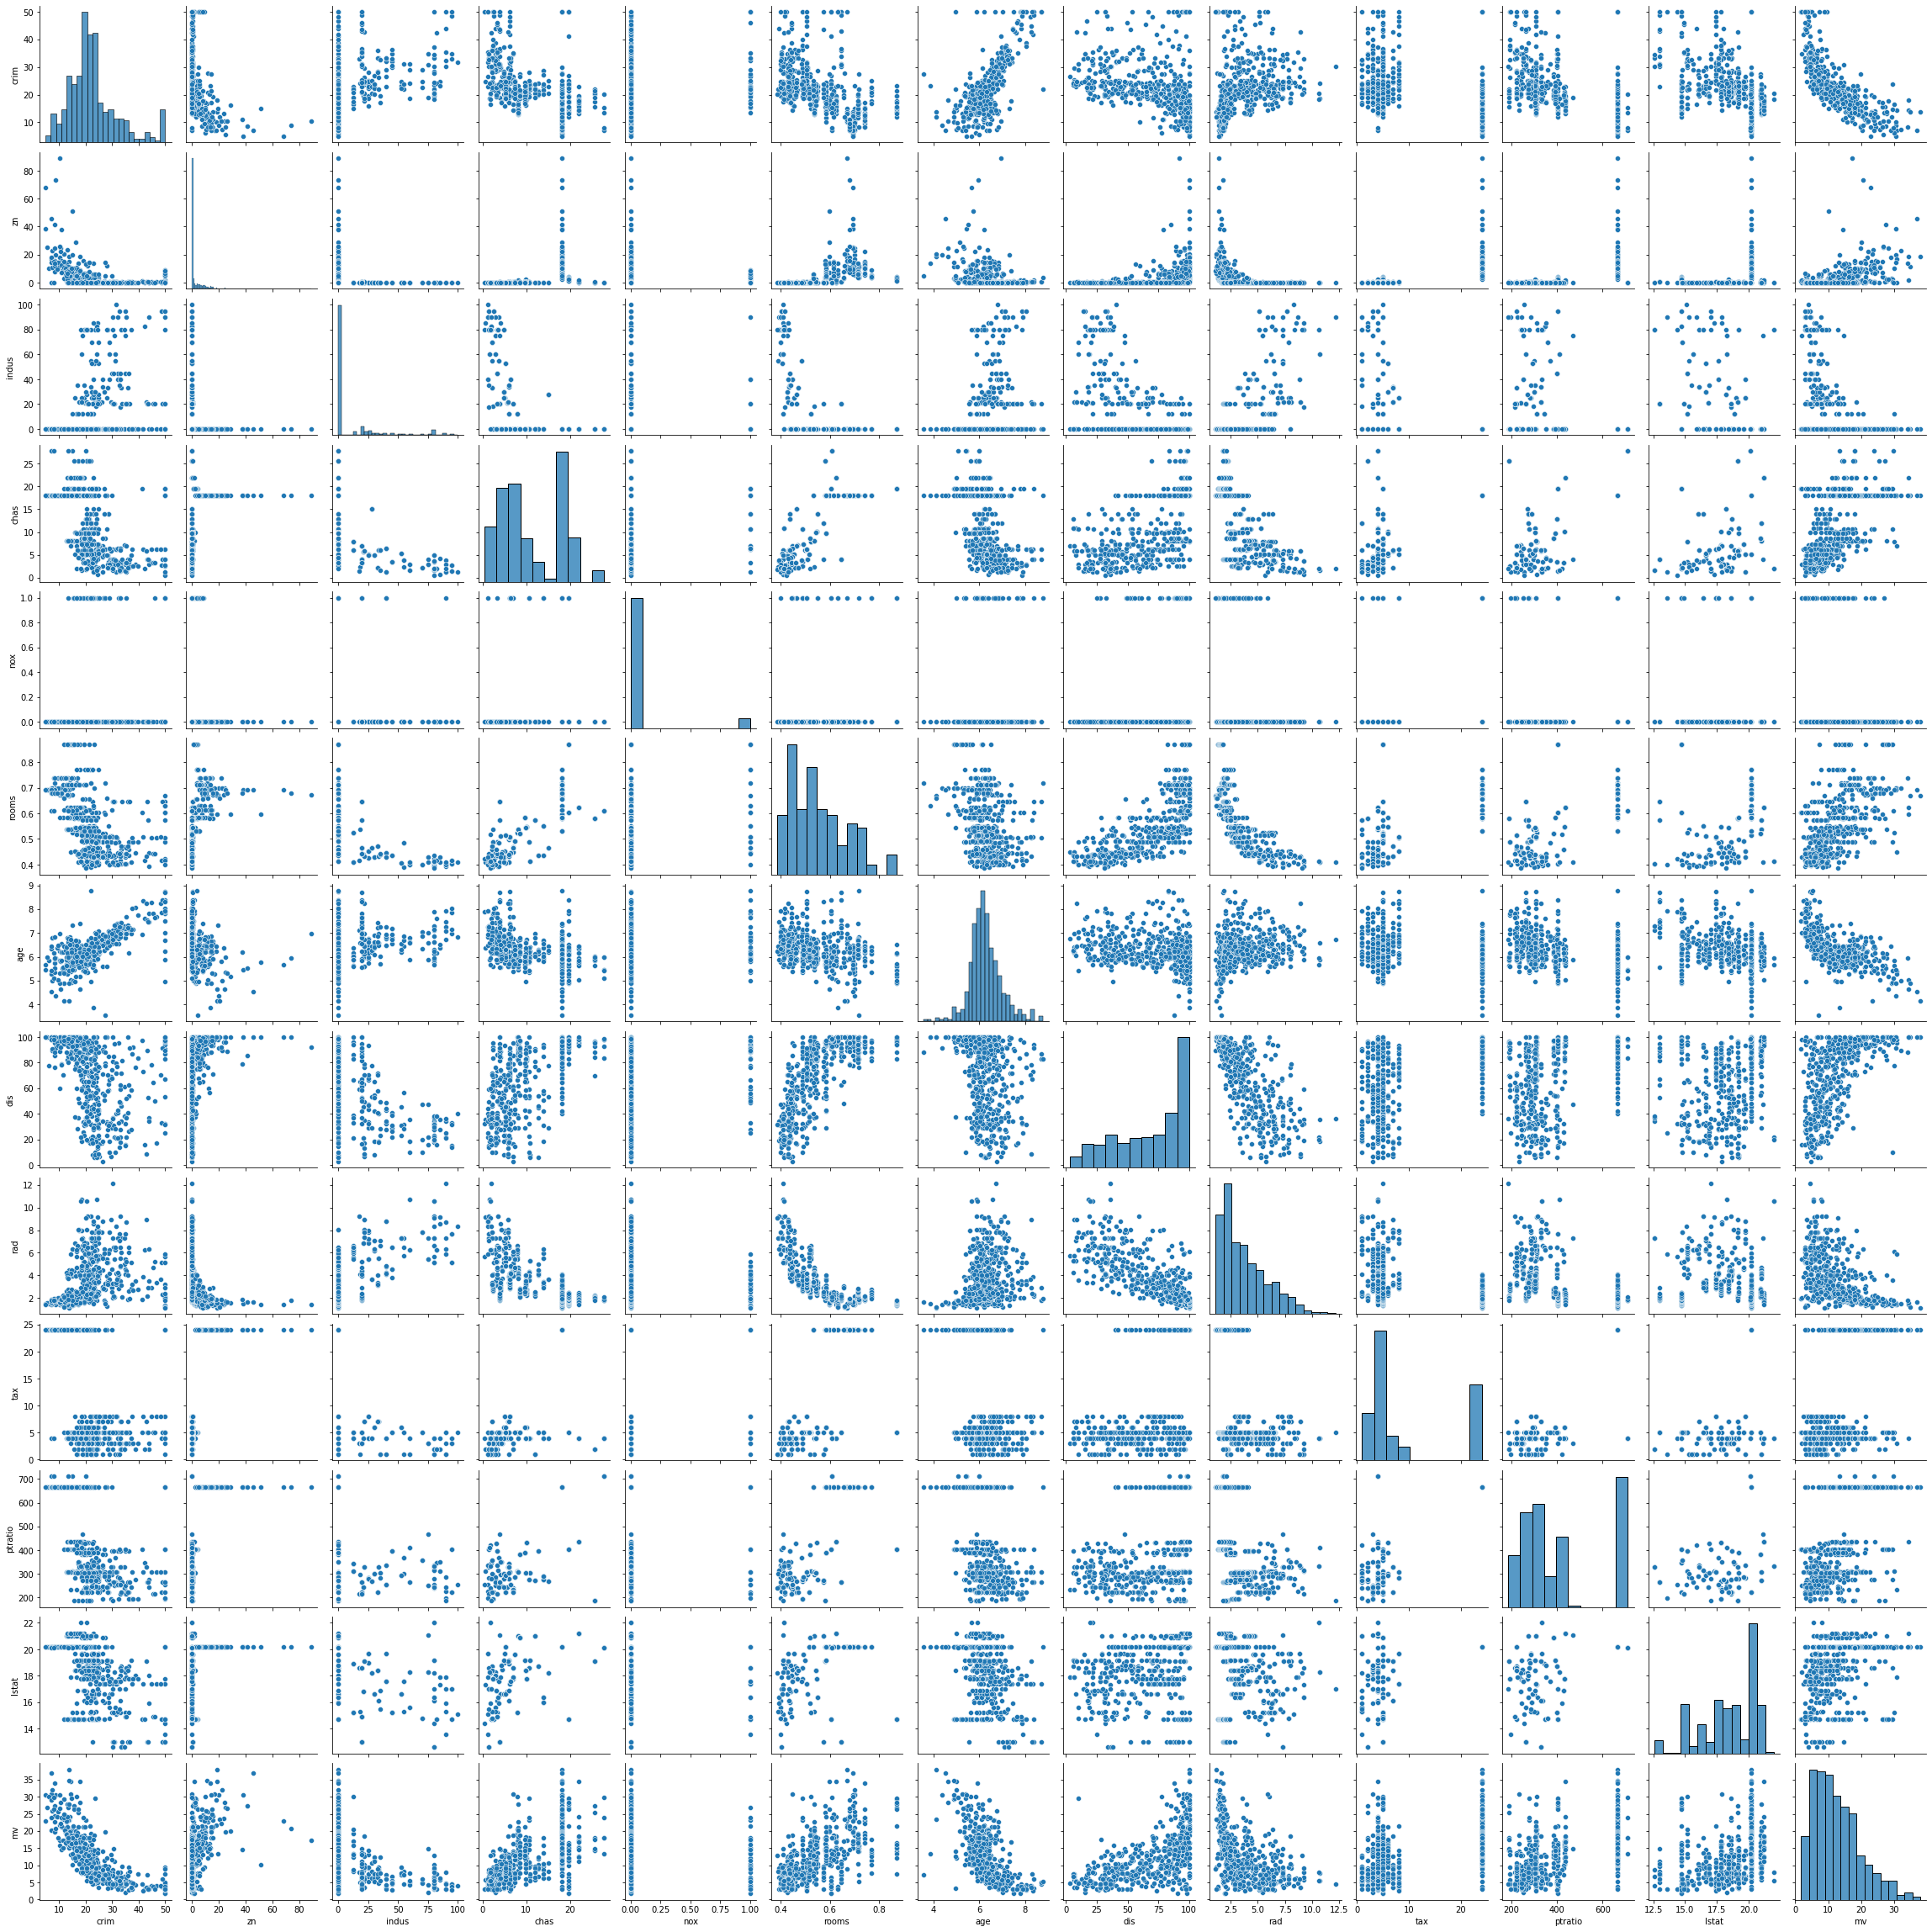

In [18]:
# Create a pairwise scatter plot 
sns.pairplot(prelim_model_df, height = 2.5)
plt.show();

# **III. Splitting the Data into Train/Test for Modeling**

In [19]:
# Create the train, test data based on 70-30 split of the data
# Use all the explanatory variables, with exception of neighborhood, where response is "mv"

y = prelim_model_df[responseVar]
X = prelim_model_df.drop(columns = responseVar)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state = 49)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(354, 12) (354, 1)
(152, 12) (152, 1)


# **IVa. Model 1 : Predicting mv with Linear Regression**

In [20]:
# using cross validation design
lin_reg = LinearRegression()

folds = KFold(n_splits = 3, shuffle = True, random_state = 50)

hyper_params = [{'n_features_to_select': list(range(1, 12))}]
rfe = RFE(lin_reg)  

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train, np.ravel(y_train, order = "C"))

cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.5s finished


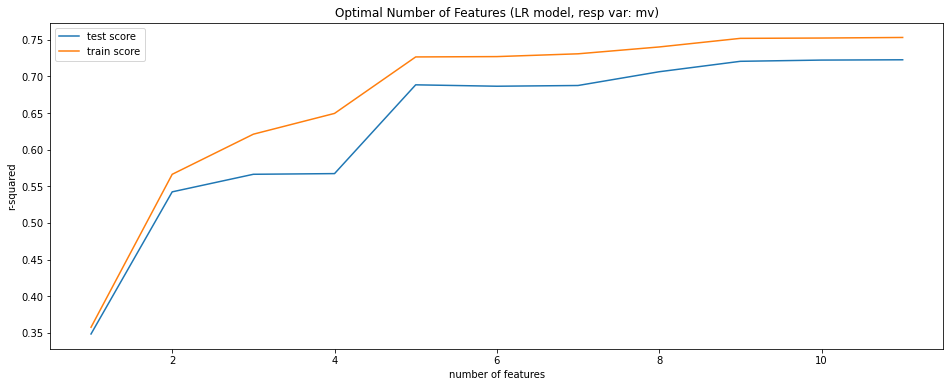

In [21]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features (LR model, resp var: mv)")
plt.legend(['test score', 'train score'], loc='upper left')

In [22]:
# print the best estimator details
print("Optimal number of features : %d" % model_cv.best_estimator_.n_features_)
features=list(X.columns[model_cv.best_estimator_.support_])
print(features)
print('ranking of features:')
model_cv.best_estimator_.ranking_

Optimal number of features : 11
['crim', 'zn', 'indus', 'chas', 'nox', 'rooms', 'age', 'dis', 'rad', 'tax', 'lstat']
ranking of features:


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1])

In [23]:
print('coefficient of determination - Linear Regression Model (Training Data + resp var: mv):', model_cv.best_estimator_.score(X_train,y_train))
print('coefficient of determination - Linear Regression Model (Test Data + + resp var: mv):', model_cv.best_estimator_.score(X_test,y_test))

coefficient of determination - Linear Regression Model (Training Data + resp var: mv): 0.748934528945141
coefficient of determination - Linear Regression Model (Test Data + + resp var: mv): 0.6445569191140632


In [24]:
print('Best Linear Regression model (response var: mv): ')
model_cv.best_estimator_

Best Linear Regression model (response var: mv): 


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=11, step=1, verbose=0)

In [25]:
print('RMSE values using best linear regression model (Response var: mv): ')
#use the best model to compute RMSE using CV design
lin_reg = model_cv.best_estimator_ ## Best LR model

lin_reg_scores  = cross_val_score(lin_reg, X, y, scoring=('neg_mean_squared_error'), cv=folds)
lin_rmse_scores = np.sqrt(-lin_reg_scores)
lin_rmse_scores

RMSE values using best linear regression model (Response var: mv): 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([3.93871965, 3.93828247, 3.83996663])

# **IVb. Model 2 : Predicting mv with Ridge Regression**

In [26]:
# using cross validation design
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

hyper_params = [{'alpha': [0, 0.1, 0.5, 1, 10, 50, 100, 200, 230, 250, 265, 270, 275, 290, 300, 500]}]
model = Ridge() 

model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train, y_train)  

cv_results = pd.DataFrame(model_cv.cv_results_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished


Text(50, 0.7209873926688487, '             optimal alpha = 50 with score 0.72')

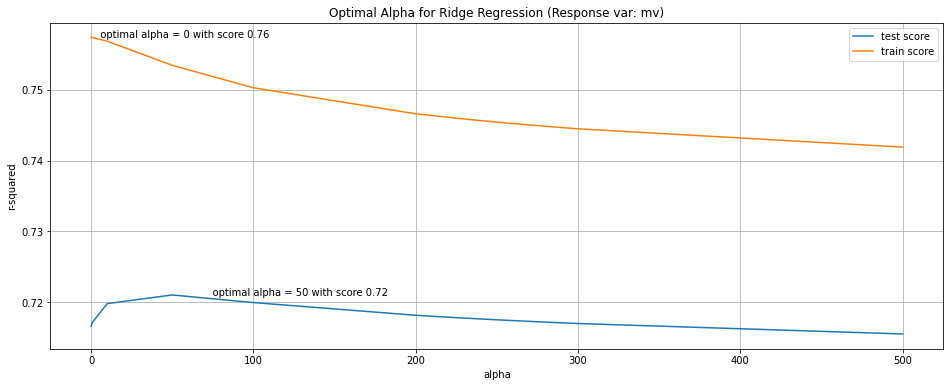

In [27]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_alpha"], cv_results["mean_test_score"])
plt.plot(cv_results["param_alpha"], cv_results["mean_train_score"])
plt.xlabel('alpha')
plt.ylabel('r-squared')
plt.grid()
plt.title("Optimal Alpha for Ridge Regression (Response var: mv)")
plt.legend(['test score', 'train score'], loc='upper right')

orange_y = max(cv_results["mean_train_score"])
orange_x = 0 # alpha of orange_y
blue_y = max(cv_results["mean_test_score"])
blue_x = 50 # alpha of blue_y
#cv_results.loc[blue_y, cv_results['param_alpha']]
#df.loc[df.Name == 'Pigeon', 'Category'].

plt.annotate('   optimal alpha = {} with score {}'.format(orange_x, round(orange_y, 2)), xy=(orange_x, orange_y))
plt.annotate('             optimal alpha = {} with score {}'.format(blue_x, round(blue_y, 2)), xy=(blue_x, blue_y))

# except I don't think we care about the train data alpha.. do we? - Kerry

In [28]:
print('coefficient of determination - Ridge Regression Model (Training Data + resp var: mv):', model_cv.best_estimator_.score(X_train,y_train))
print('coefficient of determination - Ridge Regression Model (Test Data + resp var: mv):', model_cv.best_estimator_.score(X_test,y_test))

coefficient of determination - Ridge Regression Model (Training Data + resp var: mv): 0.7501105523415096
coefficient of determination - Ridge Regression Model (Test Data + resp var: mv): 0.6324162495250784


In [29]:
print('Best Ridge model (response var: mv): ')
model_cv.best_estimator_

Best Ridge model (response var: mv): 


Ridge(alpha=50, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [30]:
print('RMSE values using best Ridge Regression model (Response var: mv): ')
#use the best model to compute RMSE using CV design
ridge_reg = model_cv.best_estimator_ ## Best Ridge model 

ridge_reg_scores  = cross_val_score(ridge_reg, X, y, scoring=('neg_mean_squared_error'), cv=folds)
ridge_rmse_scores = np.sqrt(-ridge_reg_scores)
ridge_rmse_scores

RMSE values using best Ridge Regression model (Response var: mv): 


array([3.67224008, 4.02123502, 4.12954682])

In [31]:
ridge_reg.coef_

array([[-0.40189907,  0.05439868,  0.02394398,  0.11947295, -0.06583914,
         0.0011539 , -1.09708745,  0.07498921, -0.32389688,  0.11422844,
        -0.00672956, -0.12448627]])

# **IVc. Model 3 : Predicting log(mv) with Linear Regression**

In [32]:
# using cross validation design
lin_reg = LinearRegression()

folds = KFold(n_splits = 3, shuffle = True, random_state = 50)

hyper_params = [{'n_features_to_select': list(range(1, 12))}]
rfe = RFE(lin_reg)  

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 0,
                        return_train_score=True) 

model_cv.fit(X_train, np.ravel(y_train, order = "C"))

cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results

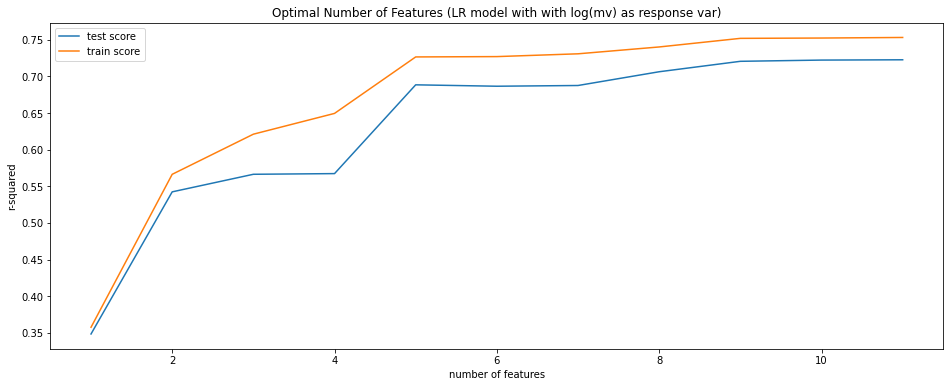

In [33]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features (LR model with with log(mv) as response var)")
plt.legend(['test score', 'train score'], loc='upper left')

In [34]:
print("Optimal number of features : %d" % model_cv.best_estimator_.n_features_)
features=list(X.columns[model_cv.best_estimator_.support_])
print(features)
print('ranking of features:')
model_cv.best_estimator_.ranking_

Optimal number of features : 11
['crim', 'zn', 'indus', 'chas', 'nox', 'rooms', 'age', 'dis', 'rad', 'tax', 'lstat']
ranking of features:


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1])

In [35]:
print('Best Linear Regression model (response var: log(mv)) : {}'.format(model_cv.best_estimator_))

Best Linear Regression model (response var: log(mv)) : RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=11, step=1, verbose=0)


In [36]:
print('coefficient of determination - Linear Regression Model (Training Data + resp var: log(mv)) : {}'.format(round(model_cv.best_estimator_.score(X_train,y_train)), 4))
print('coefficient of determination - Linear Regression Model (Test     Data + resp var: log(mv)) : {}'.format(round(model_cv.best_estimator_.score(X_test,y_test)), 4))

coefficient of determination - Linear Regression Model (Training Data + resp var: log(mv)) : 1.0
coefficient of determination - Linear Regression Model (Test     Data + resp var: log(mv)) : 1.0


In [37]:
print('RMSE values using best linear regression model (Response var: log(mv)): ')
#use the best model to compute RMSE using CV design
lin_reg = model_cv.best_estimator_ ## Best LR model

#Compute the RMSE scores using cross-validation design -- linear regression with log(mv)
lin_reg_scores  = cross_val_score(rfe, X, y, scoring=('neg_mean_squared_error'), cv = folds)
lin_rmse_scores = np.sqrt(-lin_reg_scores)
lin_rmse_scores

RMSE values using best linear regression model (Response var: log(mv)): 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([4.18887221, 4.25141537, 4.00187637])

# **IVd. Model 4 : Predicting log(mv) with Ridge Regression**

In [38]:
# using cross validation design
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

#hyper_params = [{'alpha': [0, 0.1, 0.5, 1, 10, 50, 100, 200, 230, 250, 265, 270, 275, 290, 300, 500]}]
hyper_params = [{"alpha": [i + 5 for i in range(0, 100)]}]
model = Ridge() 

model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train, y_train)  

cv_results = pd.DataFrame(model_cv.cv_results_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.8s finished


Text(36, 0.722, ' optimal alpha = 36 with score 0.72')

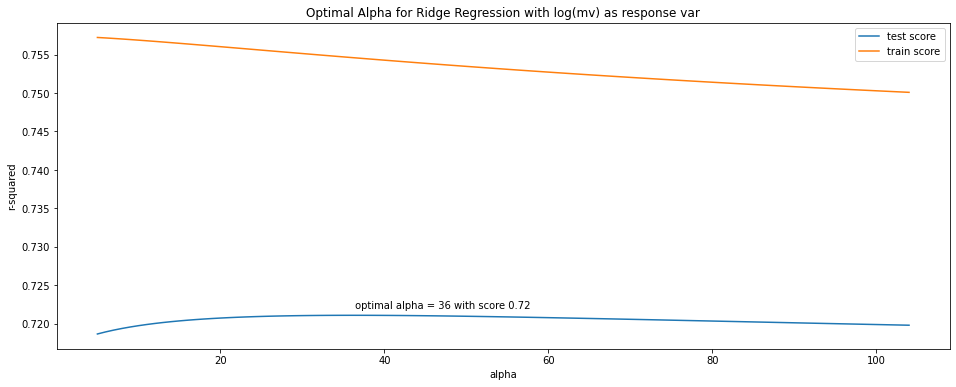

In [39]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_alpha"], cv_results["mean_test_score"])
plt.plot(cv_results["param_alpha"], cv_results["mean_train_score"])
plt.xlabel('alpha')
plt.ylabel('r-squared')
plt.title("Optimal Alpha for Ridge Regression with log(mv) as response var")
plt.legend(['test score', 'train score'], loc='upper right')

blue_y = max(cv_results["mean_test_score"])
blue_x = 36
plt.annotate(' optimal alpha = {} with score {}'.format(blue_x, round(blue_y, 2)), xy=(blue_x, round(max(cv_results["mean_test_score"]), 3)+.001))

In [40]:
print('coefficient of determination - Ridge Regression Model (Training Data + resp var: log(mv)) : {}'.format(round(model_cv.best_estimator_.score(X_train,y_train), 4)))
print('coefficient of determination - Ridge Regression Model (Test     Data + resp var: log(mv)) : {}'.format(round(model_cv.best_estimator_.score(X_test,y_test), 4)))

coefficient of determination - Ridge Regression Model (Training Data + resp var: log(mv)) : 0.7508
coefficient of determination - Ridge Regression Model (Test     Data + resp var: log(mv)) : 0.6348


In [41]:
print('Best Ridge model (response var: log(mv)): ')
model_cv.best_estimator_

Best Ridge model (response var: log(mv)): 


Ridge(alpha=36, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [42]:
print('RMSE values using best Ridge Regression model (Response var: log(mv)): ')
#use the best model to compute RMSE using CV design
ridge_reg = model_cv.best_estimator_ ## Best Ridge model 

ridge_reg_scores  = cross_val_score(ridge_reg, X, y, scoring=('neg_mean_squared_error'), cv=folds)
ridge_rmse_scores = np.sqrt(-ridge_reg_scores)
ridge_rmse_scores

RMSE values using best Ridge Regression model (Response var: log(mv)): 


array([3.66287706, 4.0118838 , 4.11781559])

In [43]:
ridge_reg.coef_

array([[-3.96538302e-01,  5.42773678e-02,  2.44271992e-02,
         1.16671098e-01, -8.64355228e-02, -5.89447348e-04,
        -1.21648324e+00,  7.50040959e-02, -3.32196041e-01,
         1.15864558e-01, -6.76296038e-03, -1.26064544e-01]])

# **IVe. Model 5 : Predicting mv with a Random Forest**

In [44]:
####### ASSUMING WE HAVE 12 VARS FROM WHICH TO CHOOSE : : : (which we do)
### max_features = 12 
### means that there will be no randomness in the features being considered for each tree ... could lead to overfitting
###
### max_features = 1 
### forces each tree to split on a single feature ... not ability to detect interaction effects
#######

### Müller and Guido (2017) suggest using max_features = ‘log2’ for random forest regression problems

### Professor recommends using n_estimators; I suspect because anything greater and it doesn't improve much;
### anything less and the model doesn't perform as well.

In [56]:
forest = RandomForestRegressor(n_estimators=5, random_state=123) # prof says use n_estimators = 100 I just wanted to see with 5
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.954
Accuracy on test set: 0.718


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [57]:
forest = RandomForestRegressor(n_estimators=100, random_state=123)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy on training set: 0.973
Accuracy on test set: 0.733


In [47]:
forest = RandomForestRegressor(max_depth=3, n_estimators=100, random_state=123, max_features="log2")
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.775
Accuracy on test set: 0.661


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [48]:
forest = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=123, max_features="log2")
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy on training set: 0.889
Accuracy on test set: 0.727


In [49]:
forest = RandomForestRegressor(max_depth=10, n_estimators=100, random_state=123, max_features="log2")
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy on training set: 0.967
Accuracy on test set: 0.749


In [50]:
forest = RandomForestRegressor(max_depth=10, n_estimators=5000, random_state=123, max_features="log2")
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy on training set: 0.968
Accuracy on test set: 0.746


In [51]:
forest = RandomForestRegressor(max_depth=3, n_estimators=5000, random_state=123, max_features="log2")
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy on training set: 0.781
Accuracy on test set: 0.671


In [52]:
forest = RandomForestRegressor(max_depth=3, n_estimators=100, random_state=123, max_features="log2")
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.775
Accuracy on test set: 0.661


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
# seems unecessary to have n_estimators > 100

In [53]:
forest = RandomForestRegressor(max_depth=3, n_estimators=100, random_state=123, max_features=12)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))  

Accuracy on training set: 0.845
Accuracy on test set: 0.714


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [54]:
forest = RandomForestRegressor(max_depth=3, n_estimators=100, random_state=123, max_features=5)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.820
Accuracy on test set: 0.699


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [55]:
forest = RandomForestRegressor(max_depth=10, n_estimators=100, random_state=123, max_features=12)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy on training set: 0.970
Accuracy on test set: 0.733


In [ ]:
# grid searching

In [81]:
tuned_parameters = [{'n_estimators': [5, 50, 100, 500, 1000, 5000], 
                    'max_depth': [2, 3, 10], 
                    'max_features': ["log2"] + [i for i in range(1, len(list(X_train.columns)))]#,
#                    'criterion' :['gini', 'entropy']
}]
                    #'min_samples_split': [1, 2, 3]}

In [82]:
clf = GridSearchCV(RandomForestRegressor(),
                   tuned_parameters,
                   cv=5,
                   verbose=0
                   )

clf.fit(X_train, y_train)
print(clf.best_estimator_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [83]:
# given by gridsearch which took like, 1 or 1.5 hours to run? :
rfr = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [85]:
rfr.fit(X_train, y_train)

print("Accuracy on training set from grid search : {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set from grid search : {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set from grid search : 0.973
Accuracy on test set from grid search : 0.733


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
